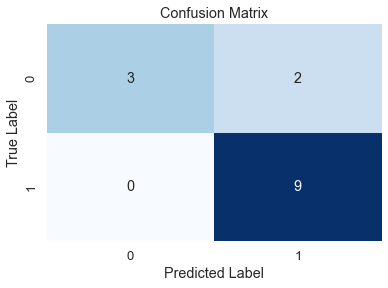

Accuracy: 0.8571428571428571
Precision: 0.8181818181818182
Recall: 1.0
F1 Score: 0.9


In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Define the dataset
# Each row represents an instance, and the last column represents the class label
# Features: weather, temperature, humidity, wind
# Class label: enjoy_sports (yes or no)

dataset = np.array([
    ['Sunny', 'Hot', 'High', 'Weak', 'No'],
    ['Sunny', 'Hot', 'High', 'Strong', 'No'],
    ['Overcast', 'Hot', 'High', 'Weak', 'Yes'],
    ['Rainy', 'Mild', 'High', 'Weak', 'Yes'],
    ['Rainy', 'Cool', 'Normal', 'Weak', 'Yes'],
    ['Rainy', 'Cool', 'Normal', 'Strong', 'No'],
    ['Overcast', 'Cool', 'Normal', 'Strong', 'Yes'],
    ['Sunny', 'Mild', 'High', 'Weak', 'No'],
    ['Sunny', 'Cool', 'Normal', 'Weak', 'Yes'],
    ['Rainy', 'Mild', 'Normal', 'Weak', 'Yes'],
    ['Sunny', 'Mild', 'Normal', 'Strong', 'Yes'],
    ['Overcast', 'Mild', 'High', 'Strong', 'Yes'],
    ['Overcast', 'Hot', 'Normal', 'Weak', 'Yes'],
    ['Rainy', 'Mild', 'High', 'Strong', 'No']
])

# Split features and class labels
X = dataset[:, :-1]  # Features
y = dataset[:, -1]  # Class labels

# Perform label encoding on the categorical features and target variable
label_encoders = [LabelEncoder() for _ in range(X.shape[1])]
X_encoded = np.column_stack([label_encoders[i].fit_transform(X[:, i]) for i in range(X.shape[1])])
y_encoded = label_encoders[-1].fit_transform(y)

# Implement Multinomial Naïve Bayes classifier
model = MultinomialNB()
model.fit(X_encoded, y_encoded)

# Predict class labels
y_pred = model.predict(X_encoded)

# Compute evaluation metrics
accuracy = accuracy_score(y_encoded, y_pred)
precision = precision_score(y_encoded, y_pred)
recall = recall_score(y_encoded, y_pred)
f1 = f1_score(y_encoded, y_pred)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_encoded, y_pred)

# Plot confusion matrix
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

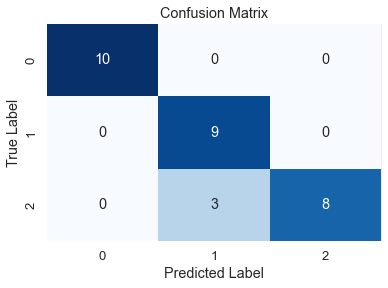

Accuracy: 0.9
Precision: 0.925
Recall: 0.9
F1 Score: 0.899248120300752


In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement Multinomial Naïve Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict class labels
y_pred = model.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)